<a href="https://colab.research.google.com/github/novandoquiro/Ovando-Lab-Reports/blob/main/Nicolas_Ovando_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture                        
!pip install wandb                 # These are just specific codes required to load and import my data into the notebook
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):   # code to plot data 
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):    # code to import data from the google slide
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):   # code to load the images from the slide into the notebook

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1U1Dul2WqFnWoblRk4rF3TC_b_ep1KOatQhc59OIeg2s/edit#slide=id.p"
# Here I am importing the url from the slides containing my datadeck which includes my 50 images

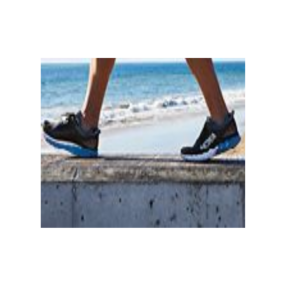

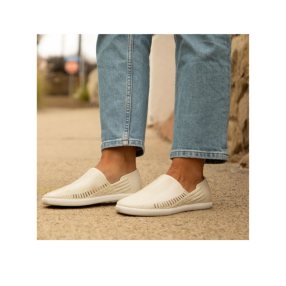

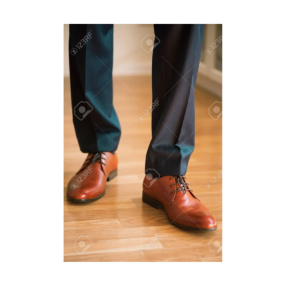

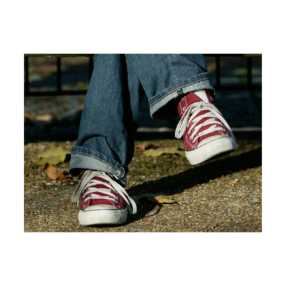

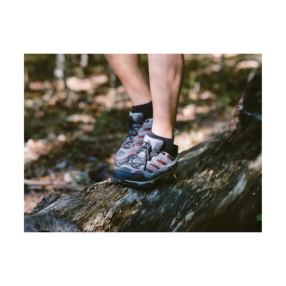

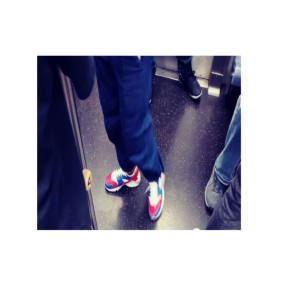

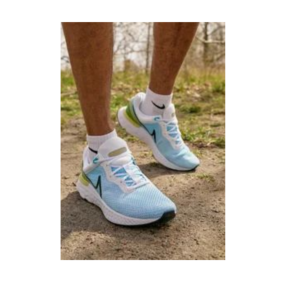

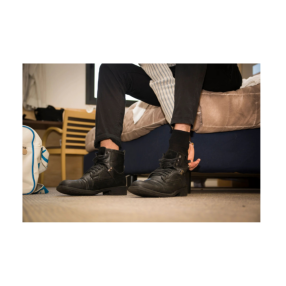

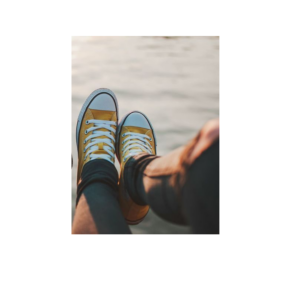

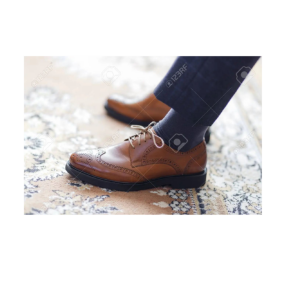

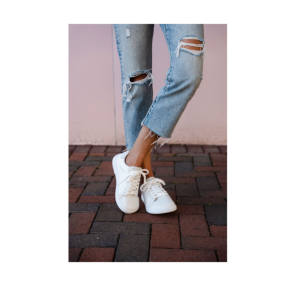

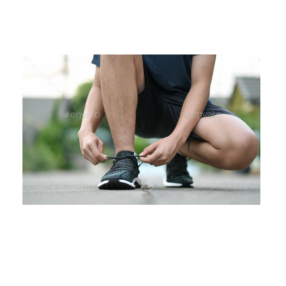

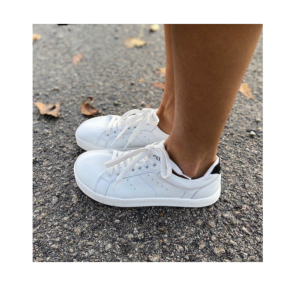

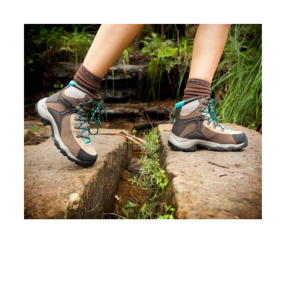

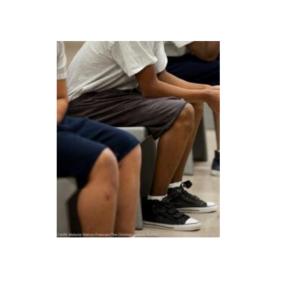

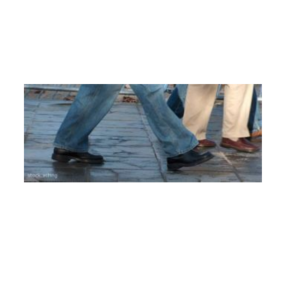

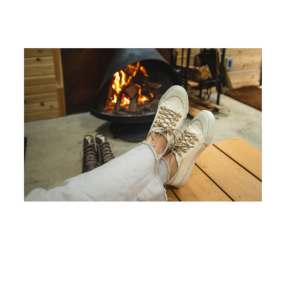

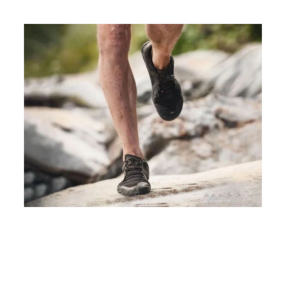

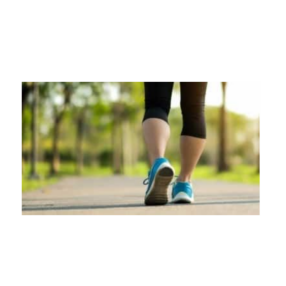

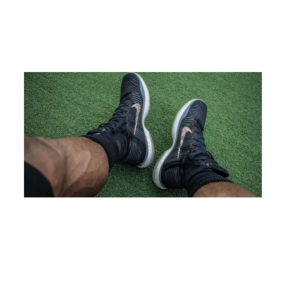

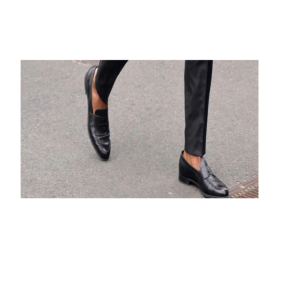

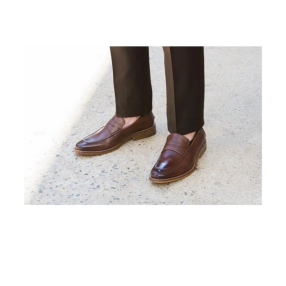

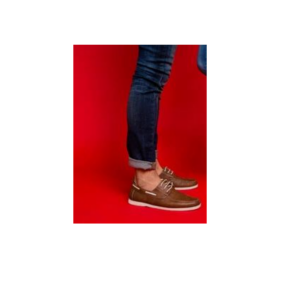

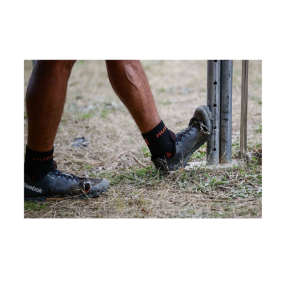

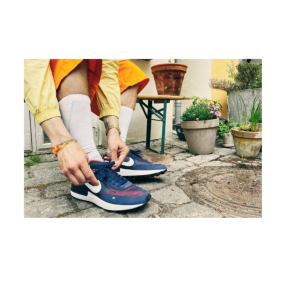

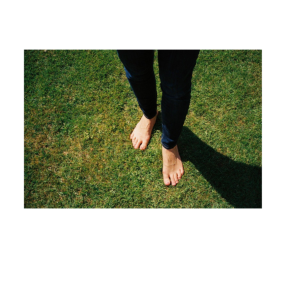

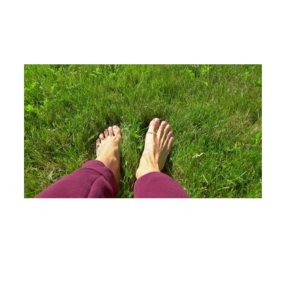

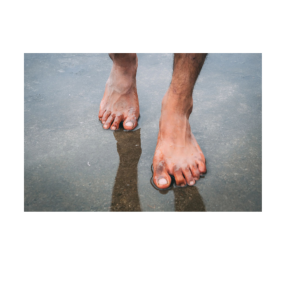

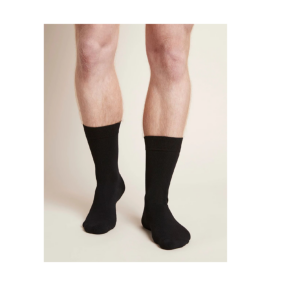

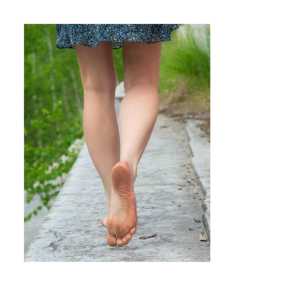

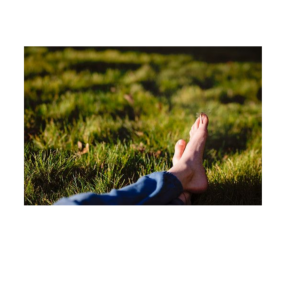

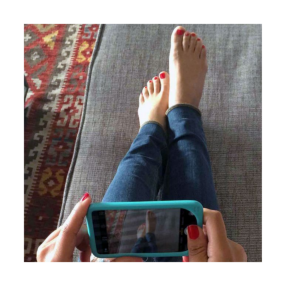

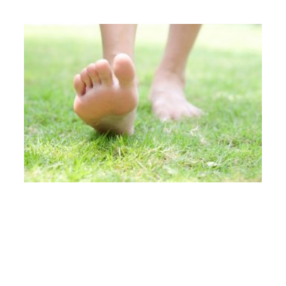

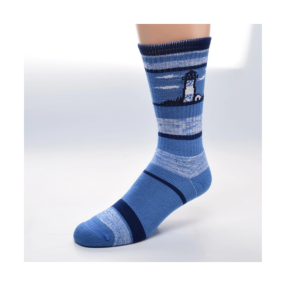

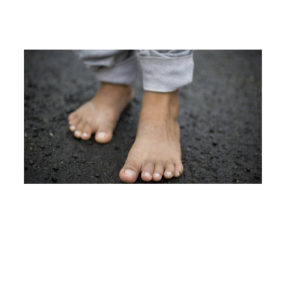

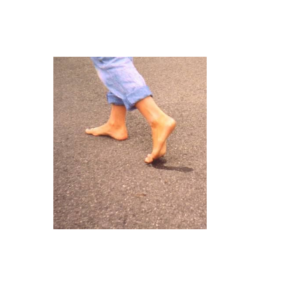

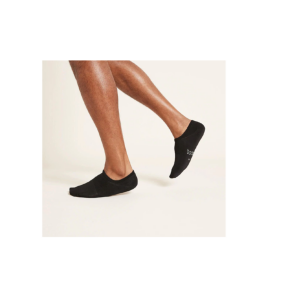

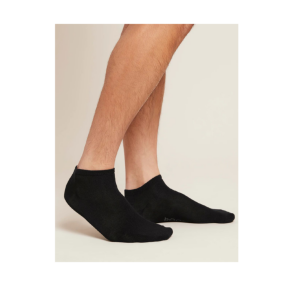

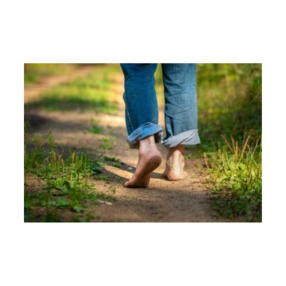

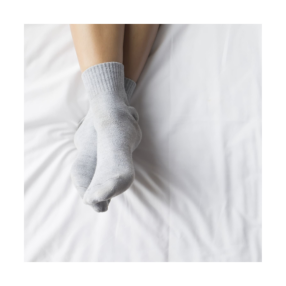

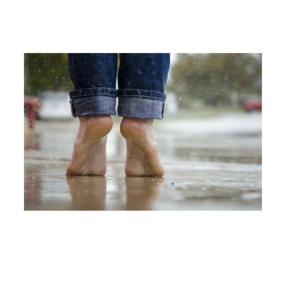

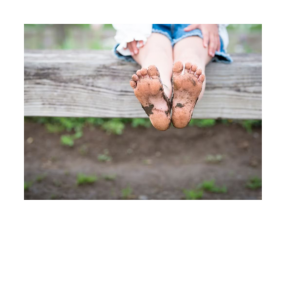

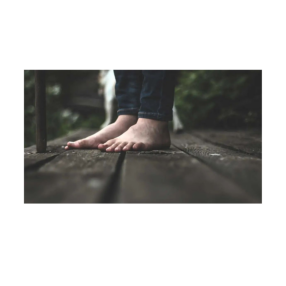

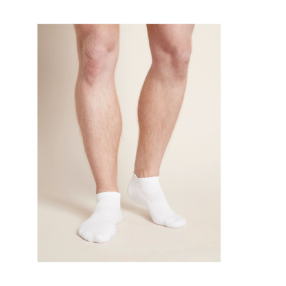

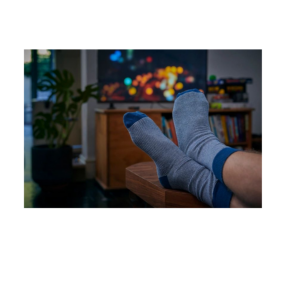

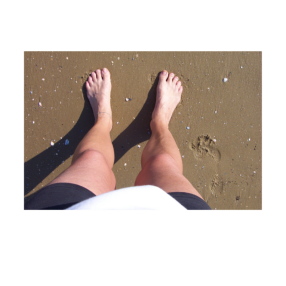

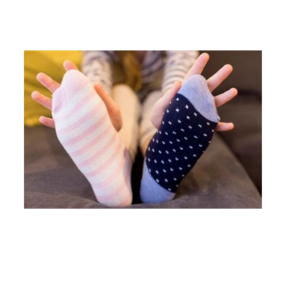

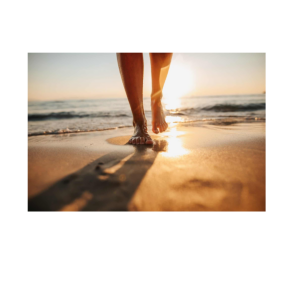

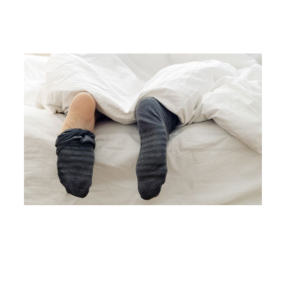

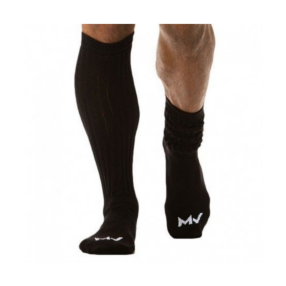

In [ ]:
images = []    # This code is giving the instruction to display or plot the images from my url in the same order as they are 

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape # I believe this code is to display the dimensions/size of the images 

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) # This code looks like it is organizing the images data 

tensor([[-0.2270, -2.3814,  0.7248,  ..., -6.1892, -0.2951,  1.6946],
        [-2.5565, -3.0267, -2.0052,  ..., -0.8884,  0.5334,  4.9577],
        [-0.9875, -1.4511, -2.6854,  ..., -0.4121,  0.7657,  1.9504],
        ...,
        [-2.8455, -0.3861, -1.8510,  ..., -2.0293, -3.3550,  2.6390],
        [ 0.2930, -3.2842, -3.0716,  ..., -4.7930, -0.3649,  8.1888],
        [ 2.9609, -1.1953, -2.3016,  ..., -0.8039, -0.3094,  4.3847]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images) # Here I am simply setting y equal to the previous code 

In [ ]:
y.shape # I believe this code shows the number of images and the possible shape/dimensions that result from the modeling of the images

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() # This code is to instruct python to take a guess on what my loaded images are with a brief description

In [ ]:
for i in list(guesses):
    print(labels[i])     # These are the results or guesses of what python thinks my images represent

web site, website, internet site, site
Band Aid
hourglass
Loafer
agama
sock
cowboy boot
Polaroid camera, Polaroid Land camera
web site, website, internet site, site
Loafer
soap dispenser
notebook, notebook computer
paper towel
pot, flowerpot
bulletproof vest
sleeping bag
web site, website, internet site, site
nail
iPod
muzzle
binder, ring-binder
Loafer
binder, ring-binder
miniature pinscher
swing
croquet ball
buckeye, horse chestnut, conker
Band Aid
sock
miniskirt, mini
buckeye, horse chestnut, conker
book jacket, dust cover, dust jacket, dust wrapper
acorn
sock
cleaver, meat cleaver, chopper
envelope
dumbbell
miniskirt, mini
croquet ball
Windsor tie
swimming trunks, bathing trunks
web site, website, internet site, site
letter opener, paper knife, paperknife
diaper, nappy, napkin
television, television system
pillow
Band Aid
hourglass
whistle
dumbbell


In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y # Here out of the 50 images 25 are displayed with zeros and the other half with ones

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape # This code is very similar to the y.shape code and the result is also the same 

(50, 1000)

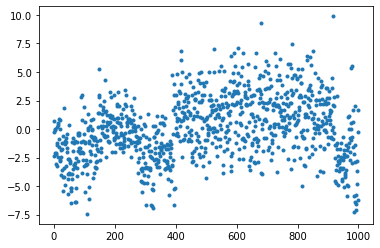

In [ ]:
plt.plot(X[0],'.') # This code is plotting the images that contain a 0 in their X shape

In [ ]:
X[0] # This is a list of all the results/dots which are plotted in the graph above 

In [ ]:
np.argmax(X[0]) # This code indentifies or locates a specific image from the data set 

916

In [ ]:
labels[916] # Here the code is displaying the label or in other words the guess of the specific image it located

'web site, website, internet site, site'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10] # This code is to sort the top ten images

In [ ]:
for i in top_ten:
    print(labels[i]) # This is the list of the labels/guesses of the top ten images

web site, website, internet site, site
notebook, notebook computer
screen, CRT screen
iron, smoothing iron
desktop computer
balance beam, beam
television, television system
laptop, laptop computer
monitor
plane, carpenter's plane, woodworking plane


(array([ 19.,  45., 148., 231., 238., 173.,  93.,  41.,  10.,   2.]),
 array([-7.435096 , -5.7032332, -3.9713712, -2.2395086, -0.5076464,
         1.224216 ,  2.9560783,  4.6879406,  6.419803 ,  8.151666 ,
         9.883528 ], dtype=float32),
 <a list of 10 Patch objects>)

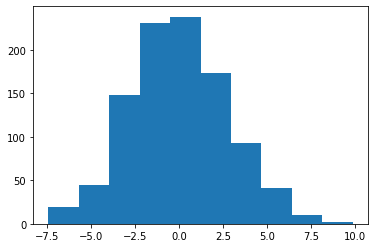

In [ ]:
plt.hist(X[0]) # This is a histogram to visualize the image data 

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x): # Values will always lie between 0 and 1
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels): # Predicts which class does the data belong to            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): # size of the truncated normal numbers

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape # size dimensions 

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":                            # code to get batch from the dataset to create the train 
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config
                                               # this block of code is to finally put everything in the dataset into a code and be able to run it and get the acc train results and the loss
c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-3-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


#Out of the three runs my results are as following:
Best run: 0.9234 effortless-vortex-3

Second best run: 0.5933 whole-totem-1

Worst run: 0.5913 floral-eon-2

https://tensorspace.org/